# 初期設定  
MeCabのインストール、日本語の書式設定

MeCabのインストール

In [1]:
%%bash
apt-get install mecab swig libmecab-dev mecab-ipadic-utf8 >/dev/null
pip -q install mecab-python3

In [2]:
%%bash
mecab -v

mecab of 0.996



日本語フォントのインストール

In [3]:
%%bash
sudo apt update
sudo apt install fonts-ipaexfont

Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [817 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:11 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [85.6 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu





debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 


matplotlib用

In [4]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.1 MB 5.6 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=ac6900f3b5245690c26d5291f9dee95da7667bbefbeb849e39fe9960130103b2
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


# 歌詞の収集

## 歌手の曲名ページの収集

In [5]:
import os
import re
from bs4 import BeautifulSoup
import time
import requests
import pprint

In [6]:
# 歌ネットのURL
uta_net_url = 'https://www.uta-net.com'

# アーティストの名前（テキストファイルの名前）
# artist_name = input('')
artist_name = 'aiko'

In [7]:
# アーティストのURL（人気順）
# artist_url = input('') 
# https://www.uta-net.com/artist/39/4/
artist_url = 'https://www.uta-net.com/artist/39/4/'

In [8]:
def get_artist_page(url):
    res = requests.get(url)
    res.raise_for_status()
    return res.text

In [9]:
# アーティストページの取得
html = get_artist_page(artist_url)

# 曲ごとのurlを格納
musics_url = []
# 歌詞を格納
all_lyrics = ''

In [10]:
# html

## 歌詞の収集

In [11]:
def pickup_tag(html, find_tag):
    soup = BeautifulSoup(str(html), 'html.parser')
    tag = soup.find_all(find_tag)

    return tag

In [12]:
""" 曲のurlを取得 """
# td要素の取り出し
for td in pickup_tag(html, 'td'):
    # a要素の取り出し
    for a in pickup_tag(td, 'a'):
        # href属性にsongを含むか
        if 'song' in a.get('href'): 
            # urlを配列に追加
            musics_url.append(uta_net_url + a.get('href'))

In [13]:
# 学習用
# musics_url = musics_url[:10]

In [14]:
def parse(html):
    soup = BeautifulSoup(str(html), 'html.parser')
    # htmlタグの排除
    lyrics_row = soup.getText()
    lyrics_row = lyrics_row.replace('\n', '')
    lyrics_row = lyrics_row.replace('　', '')

    # 英数字の排除
    lyrics_row = re.sub(r'[a-zA-Z0-9]', '', lyrics_row)
    # 記号の排除
    lyrics_row = re.sub(r'[ ＜＞♪`‘’“”・…_！？!-/:-@[-`{-~]', '', lyrics_row)
    # 注意書きの排除
    lyrics = re.sub(r'注意：.+', '', lyrics_row)

    return lyrics

In [15]:
""" 歌詞の取得 """
for i, page in enumerate(musics_url):
    print('{}曲目:{}'.format(i + 1, page))
    html = get_artist_page(page)
    for div in pickup_tag(html, 'div'):
        # id検索がうまく行えなかった為、一度strにキャスト
        div = str(div)
        # 歌詞が格納されているdiv要素か
        #if r'itemprop="text"' in div:
        if r'id="kashi_area"' in div:
            # 不要なデータを取り除く
            lyrics = parse(div)

            # 「この歌詞をマイ歌ネットに登録 このアーティストをマイ歌ネットに登録」を削除 
            lyrics = lyrics[:-34]

            print(lyrics, end = '\n\n')

            # 歌詞を１つにまとめる
            all_lyrics += lyrics + '\n'

            # １秒待機
            time.sleep(1)
            break

1曲目:https://www.uta-net.com/song/12170/
悩んでる身体が熱くて指先は凍える程冷たい「どうしたはやく言ってしまえ」そう言われてもあたしは弱いあなたが死んでしまってあたしもどんどん年老いて想像つかないくらいよそう今が何より大切でスピード落としたメリーゴーランド白馬のたてがみが揺れる少し背の高いあなたの耳に寄せたおでこ甘い匂いに誘われたあたしはかぶとむし流れ星ながれる苦しうれし胸の痛み生涯忘れることはないでしょう生涯忘れることはないでしょう鼻先をくすぐる春リンと立つのは空の青い夏袖を風が過ぎるは秋中そう気が付けば真横を通る冬強い悲しいこと全部心に残ってしまうとしたらそれもあなたと過ごしたしるしそう幸せに思えるだろう息を止めて見つめる先には長いまつげが揺れてる少し癖のあるあなたの声耳を傾け深い安らぎ酔いしれるあたしはかぶとむし琥珀の弓張り月息切れすら覚える鼓動生涯忘れることはないでしょう生涯忘れることはないでしょう

2曲目:https://www.uta-net.com/song/204052/
もっともっともっともっとねぇもっとそばにいたかったんだ嫌いになればいい僕の事なんて忘れて嫌いになる言葉ばかり並べてた何も見えなくて全然良かったんだ君の笑った顔だけでいいと思ってた枯れて行く季節に花があってずっと鮮やかで立っているから摘んで僕だけのものにしたくってちぎった所から黒くなって僕の前から消えた君の心が消えた「あたしはねあなたの事が好きなんだよ」信じてられた瞬間はほんとに瞬間でもっともっともっともっとねぇもっとそばにいたかったんだいつの間に伸びた癖のある後ろ髪緩やかに跳ねてどこに飛んで行った振り返るのは僕前を向くのは君重なった道で何度も確かめたのに見違える程奇麗にならないで陽射しの強い日のまつげの影少しかすれた声を触った全てを包み込んだ僕の腕僕の前から消えた君の心が消えた「あたしはねあなたをずっと見てたんだよ」反らした視線の先で愛の最後溶けたもっともっともっともっとねぇもっと一緒にいたかったんだ誰も知らなくても明日が曇りでも約束はなくてもそれでいい少しだけ冷えた君の手のひらを温められたら良かったはずなのに僕の前から消えた君の心が消えた「あたしはねあなたの事が好きなんだよ」信じてられた瞬間はほんとに瞬間でもっともっともっともっとねぇもっと

# 形態素解析

In [16]:
import MeCab

# 曲ごとに区切る
lines = all_lyrics.split('\n')

mecab = MeCab.Tagger('-r/etc/mecabrc -Ochasen')
mecab.parse('')

# 曲を取得 lines[0]に指定すると一曲のみ
node = mecab.parseToNode("".join(lines))
output = []

# 意味をなさないような単語を除外する。
stoplist=['「', '」', 'じゅう', 'そこら', 'れる', 'くい','ん','よう','の']

#除外するか悩む単語
stoplist += ['事','こと','何','それ','ない']

# 品詞に分解して、必要のない品詞は除外している。
while node:
    word_type = node.feature.split(",")[0]
    if word_type in ["名詞","形容詞"]: #["名詞","動詞","形容詞","副詞"]
        if not node.surface in stoplist and not node.surface.isdigit():
            output.append(node.surface.upper())
    node = node.next
# print(output)

## 棒グラフで可視化

In [17]:
#単語の数カウント
import collections
c = collections.Counter(output)
print(c.most_common(20))

[('あなた', 858), ('あたし', 686), ('今', 187), ('心', 170), ('人', 160), ('様', 150), ('時', 147), ('目', 144), ('日', 141), ('好き', 134), ('いい', 112), ('中', 109), ('今日', 104), ('空', 102), ('君', 101), ('度', 99), ('手', 95), ('胸', 91), ('気持ち', 91), ('声', 84)]


In [18]:
# cのまま表示
# plt.barh(list(c_50.keys()), list(c_50.values()))

In [19]:
import japanize_matplotlib

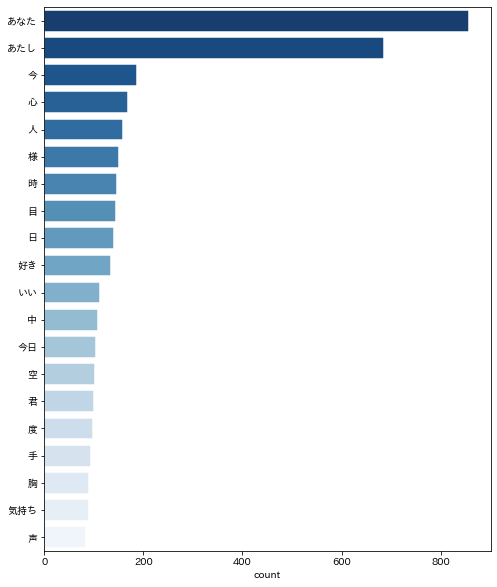

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.subplots(figsize=(8, 10))
sns.set(font="Hiragino Maru Gothic Pro",context="talk",style="white")
sns.countplot(y=output,order=[i[0] for i in c.most_common(20)],palette="Blues_r")

## WordCloudで可視化

In [21]:
from wordcloud import WordCloud

#形態素解析された単語のリストをWordCloud用に処理している。
text = ' '.join(output)

#日本語はダウンロードしたの日本語フォントのパスを貼り付ける
fpath = "/usr/share/fonts/opentype/ipaexfont-gothic/ipaexg.ttf"
wordcloud = WordCloud(background_color="white", font_path=fpath, width=800,height=600).generate(text)

#WordCloudの画像は下記のディレクトリ内に保存されます。
#wordcloud.to_file("/content/sample_data/sample_shirasujiro.png")

(-0.5, 799.5, 599.5, -0.5)

findfont: Font family ['Hiragino Maru Gothic Pro'] not found. Falling back to DejaVu Sans.


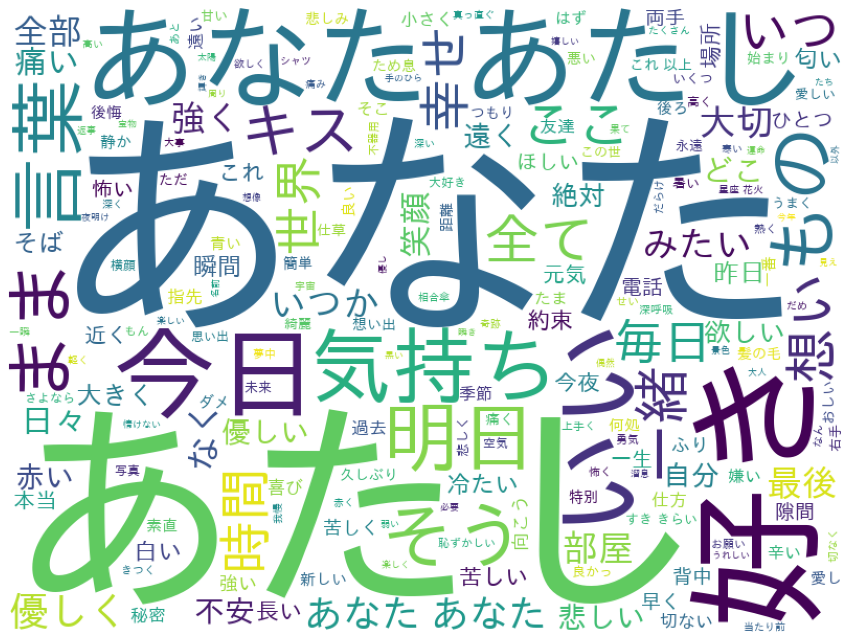

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")